In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
from researchlib.single_import import *

In [143]:
ctf = [transforms.RandomCrop(32, padding=4), transforms.RandomHorizontalFlip()]

# Load dataset
train_loader = FromPublic('cifar10', 'train', batch_size=512, num_workers=4, custom_tf=ctf)
test_loader = FromPublic('cifar10', 'test', batch_size=512, num_workers=4)

Files already downloaded and verified
Files already downloaded and verified


In [148]:
# Model
model = SENet18(input_dim=3)

# Learning
runner = Runner(model, train_loader, test_loader, optimizer='adam', loss_fn='focal')

In [149]:
for _ in range(3): runner.fit_onecycle(1e-3, mixup_alpha=0.4)

0.37493782623291017
0.5743

Test set: Average loss: 0.0031


0.5091629907226563
0.6567

Test set: Average loss: 0.0024


0.5851024508666992
0.7419

Test set: Average loss: 0.0018


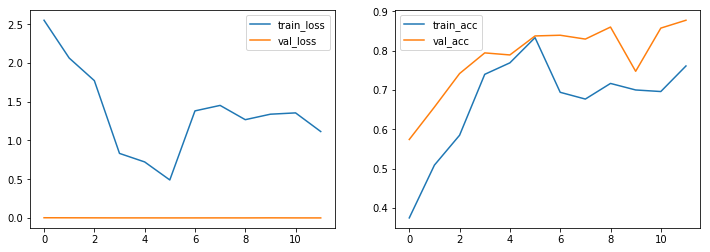

In [171]:
runner.history(plot=True)

In [ ]:
runner.fit_cycle(3, 1e-3, mixup_alpha=0.4)

0.7243462997436524
0.8761

Test set: Average loss: 0.0009


0.7320778707885742
0.8539

Test set: Average loss: 0.0010


0.7455879107666016
0.8868

Test set: Average loss: 0.0009


0.7306767324829102
0.8698

Test set: Average loss: 0.0010


0.7607747814941406
0.8876

Test set: Average loss: 0.0008


0.8774

Test set: Average loss: 0.0009


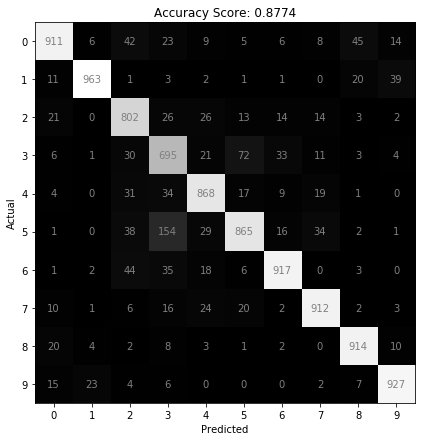

In [170]:
runner.validate(metrics=[ConfusionMatrix(plot=True, classes=10)])